In [1]:
import os
import cv2

os.environ["BLIS_NUM_THREADS"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"
cv2.setNumThreads(4)

from fast_bfmatcher.benchmark import benchmark_cc_matchers

In [2]:
benchmark_cc_matchers()

TFL2BFMatcher requires eager mode to be enabled! Call tf.enable_eager_execution() first.
Skipping tensorflow benchmark, got error: TFL2BFMatcher requires eager mode to be enabled! Call tf.enable_eager_execution() first.

>> Benchmarking matchers ...
fast                 calls : 100 steps took  0.844 [s], per step  8.442 [ms] 
opencv               calls : 100 steps took  5.643 [s], per step 56.434 [ms] 
numpy                calls : 100 steps took  4.515 [s], per step 45.153 [ms] 

>> Benchmarking distance matrix computation ...
fast                 calls : 100 steps took  0.651 [s], per step  6.511 [ms] 
numpy                calls : 100 steps took  1.806 [s], per step 18.064 [ms] 

>> Benchmarking find row col min values and indices ...
fast                 calls : 100 steps took  0.212 [s], per step  2.116 [ms] 
numpy                calls : 100 steps took  0.790 [s], per step  7.904 [ms] 


# Matching benchmark

In [3]:
from fast_bfmatcher.benchmark import benchmark_cc_rt_size_scan
import pandas as pd
metrics = benchmark_cc_rt_size_scan(step = 1000)

fast-rt N=100: 1 steps took  0.003 [s], per step  2.592 [ms] 
fast-rt N=1100: 1 steps took  0.068 [s], per step 67.528 [ms] 
fast-rt N=2100: 1 steps took  0.193 [s], per step 192.984 [ms] 
fast-rt N=3100: 1 steps took  0.411 [s], per step 410.842 [ms] 
fast-rt N=4100: 1 steps took  0.724 [s], per step 724.225 [ms] 
fast-rt N=5100: 1 steps took  1.119 [s], per step 1118.638 [ms] 
fast-rt N=6100: 1 steps took  1.604 [s], per step 1604.205 [ms] 
fast-rt N=7100: 1 steps took  2.134 [s], per step 2133.633 [ms] 
fast-rt N=8100: 1 steps took  2.766 [s], per step 2766.467 [ms] 
fast-rt N=9100: 1 steps took  4.383 [s], per step 4383.301 [ms] 
fast-cc N=100: 1 steps took  0.002 [s], per step  1.991 [ms] 
fast-cc N=1100: 1 steps took  0.052 [s], per step 52.155 [ms] 
fast-cc N=2100: 1 steps took  0.215 [s], per step 215.233 [ms] 
fast-cc N=3100: 1 steps took  0.524 [s], per step 523.767 [ms] 
fast-cc N=4100: 1 steps took  0.850 [s], per step 849.880 [ms] 
fast-cc N=5100: 1 steps took  1.247 [s], 

Text(0, 0.5, 'Matching time [ms]')

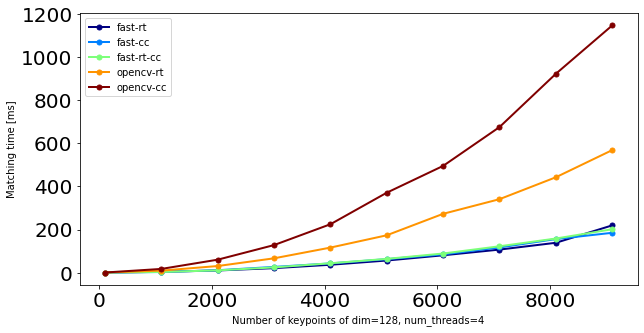

In [7]:
df = pd.DataFrame(metrics)
ax = df.set_index("size").plot(lw=2, colormap='jet', marker='.', markersize=10, figsize=(10, 5), fontsize=20)
ax.set_xlabel("Number of keypoints of dim=128, num_threads=4")
ax.set_ylabel("Matching time [ms]")

# Distance matrix 

In [8]:
import numpy as np
from scipy.spatial import distance_matrix

X = np.random.randn(1000, 512).astype(np.float32)
%timeit -n 3 distance_matrix(X, X)

845 ms ± 38.6 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [9]:
from fast_bfmatcher import l2_distance_matrix
%timeit -n 3 l2_distance_matrix(X, X)

4.38 ms ± 929 µs per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [10]:
D1 = distance_matrix(X, X)
D2 = np.sqrt(np.maximum(l2_distance_matrix(X, X), 0))

np.abs(D1 - D2).max() / D1.max()

0.0007036072466672015